# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("env.txt")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_current_price * my_btc
my_eth_value = eth_current_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38079.60
The current value of your 5.3 ETH is $9104.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
current_date_iso = datetime.datetime.now().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
start_date = pd.Timestamp("2022-10-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-10-20", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_ticker.head(10)

AGG                                       \
                           close     high      low trade_count   open   
timestamp                                                               
2022-10-20 04:00:00+00:00  93.63  94.2555  93.5648       19993  94.06   
2022-10-21 04:00:00+00:00  93.77  93.8650  93.2000       35983  93.27   
2022-10-24 04:00:00+00:00  93.64  94.0300  93.4500       20958  93.77   
2022-10-25 04:00:00+00:00  94.56  94.7050  94.3600       35408  94.39   
2022-10-26 04:00:00+00:00  94.98  95.1700  94.7600       27076  94.78   
2022-10-27 04:00:00+00:00  95.46  95.6204  94.9900       22182  95.21   
2022-10-28 04:00:00+00:00  95.22  95.4600  94.9800       25988  95.01   
2022-10-31 04:00:00+00:00  94.90  95.0600  94.6000       31561  95.01   
2022-11-01 04:00:00+00:00  94.86  95.3500  94.6501       30080  95.25   
2022-11-02 04:00:00+00:00  94.70  95.5100  94.5300       33414  94.98   

                                                   SPY                   \
                             volume       vwap   close    high      low   
timestamp                                                                 
2022-10-20 04:00:00+00:00   9080735  93.839439  365.41  372.67  364.610   
2022-10-21 04:00:00+00:00   8667549  93.660714  374.29  374.80  363.540   
2022-10-24 04:00:00+00:00   6142862  93.732724  378.87  380.06  373.110   
2022-10-25 04:00:00+00:00  11765281  94.523025  384.92  385.25  378.671   
2022-10-26 04:00:00+00:00   8082368  94.950682  382.02  387.58  381.350   
2022-10-27 04:00:00+00:00   7271399  95.420346  379.98  385.00  379.330   
2022-10-28 04:00:00+00:00   6402642  95.232324  389.02  389.52  379.680   
2022-10-31 04:00:00+00:00  12262745  94.893551  386.21  388.40  385.260   
2022-11-01 04:00:00+00:00   8241697  94.858497  384.52  390.39  383.290   
2022-11-02 04:00:00+00:00   8929120  94.990237  374.87  388.63  374.760   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2022-10-20 04:00:00+00:00      637990  368.03   89795566  367.677194  
2022-10-21 04:00:00+00:00      720347  365.12  134419474  369.961300  
2022-10-24 04:00:00+00:00      627087  375.89   87697246  377.394881  
2022-10-25 04:00:00+00:00      599910  378.79   80716012  383.027887  
2022-10-26 04:00:00+00:00      659898  381.62  104989718  383.857798  
2022-10-27 04:00:00+00:00      602264  383.07   83114489  381.328416  
2022-10-28 04:00:00+00:00      597440  379.87  103100112  385.714664  
2022-10-31 04:00:00+00:00      593420  386.44   97000212  386.860412  
2022-11-01 04:00:00+00:00      542405  390.14   85675227  385.590877  
2022-11-02 04:00:00+00:00      896387  383.90  129869586  381.458626

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close']
spy_close_price = df_ticker['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price.iloc[0]:.2f}")
print(f"Current SPY closing price: ${spy_close_price.iloc[0]:.2f}")

Current AGG closing price: $93.63
Current SPY closing price: $365.41


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price.iloc[0]
my_agg_value = my_agg * agg_close_price.iloc[0]
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18270.50
The current value of your 200 AGG shares is $18726.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_value = my_agg_value + my_spy_value
crypto_value = my_btc_value + my_eth_value
financial_assets = {'amount': [crypto_value, shares_value]}
index = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets, index=index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,47183.675
shares,36996.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

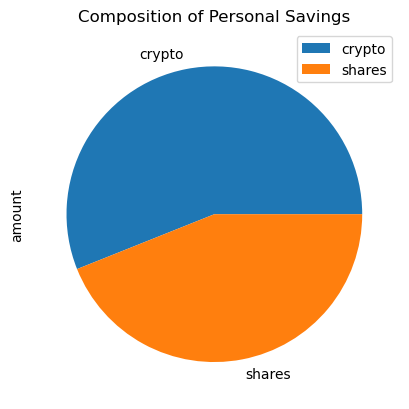

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares_value + crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
if total_savings < emergency_fund:
    difference = emergency_fund - total_savings
    print(f"You are ${difference:.2f} dollars away the person is from reaching the goal.")
if total_savings == emergency_fund:
    print("Congratulations! You on reaching this financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
timeframe = "1Day"
start_date_new = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_new = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_new,
    end=end_date_new
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [36]:
# Printing the simulation input data
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_thirty_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005481,1.002277,1.002936,1.000215,0.999870,0.993005,1.002241,0.997533,0.998673,0.998591,...,0.999126,1.002465,1.003640,0.992330,0.991602,0.990895,1.000577,1.002252,0.996750,0.995729
2,1.016154,0.997940,1.008084,0.994999,1.000258,0.992373,1.009949,0.989408,0.998995,0.999362,...,0.999715,1.006464,1.003189,0.990297,0.987972,0.982643,1.007140,1.000780,0.993722,0.997658
3,1.023923,1.002200,1.004141,0.993757,1.003187,0.984522,1.009731,0.993223,0.998877,0.999775,...,1.006927,0.997291,1.010108,0.992043,0.977470,0.992846,1.009509,1.004874,0.988761,0.992449
4,1.017456,1.008155,1.002328,0.998178,0.999715,0.987581,1.003116,0.995392,0.991368,1.010715,...,1.012782,0.992281,1.008060,0.993980,0.966016,0.994661,1.005899,1.000436,0.987943,0.986926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.421105,6.622676,12.529224,15.733855,7.358703,10.019565,9.158596,6.901178,3.666025,6.048157,...,16.069591,6.699097,11.887941,4.073578,2.306980,4.799723,7.832150,10.807587,7.007012,6.793110
7557,3.424427,6.562487,12.580081,15.877485,7.282650,9.996808,9.221220,6.899595,3.649106,6.057555,...,15.943505,6.701701,11.823740,4.076409,2.277619,4.802793,7.838324,10.750174,7.035956,6.783363
7558,3.389583,6.589609,12.647602,15.865814,7.325209,10.009924,9.235607,6.921741,3.634516,6.129395,...,15.888312,6.769995,11.879687,4.116227,2.304729,4.809385,7.792289,10.709820,7.065982,6.751217
7559,3.380274,6.543331,12.739067,15.859764,7.271831,9.949959,9.292609,6.888751,3.616302,6.094124,...,15.876024,6.763458,11.942769,4.130945,2.301172,4.821890,7.798975,10.804489,7.032848,6.759268


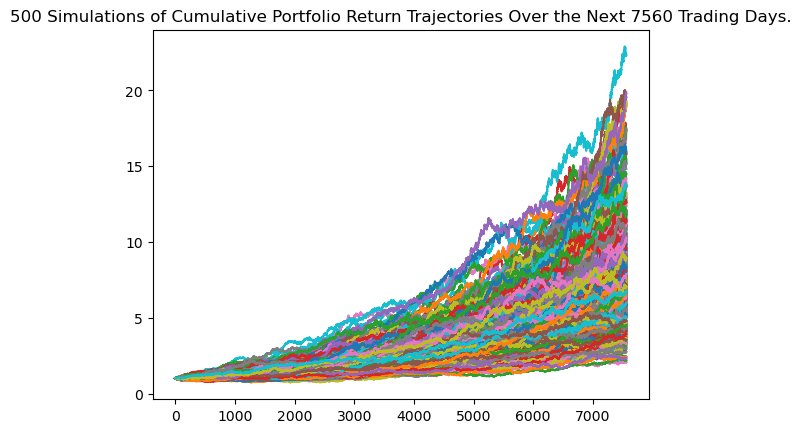

In [38]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

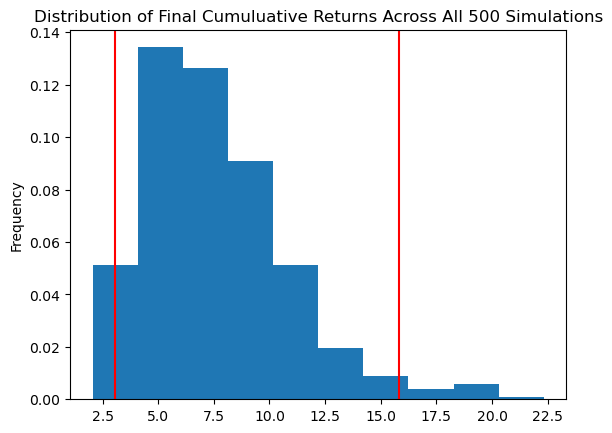

In [39]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_thirty = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_thirty)

count           500.000000
mean              7.558841
std               3.313696
min               2.060938
25%               5.199071
50%               6.866324
75%               9.300003
max              22.323297
95% CI Lower      3.052134
95% CI Upper     15.809590
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30 = round(tbl[8]*20000,2)
ci_upper_30 = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $360048216938.05 and $63043614698506.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 30000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty = round(tbl[8]*30000,2)
ci_upper_thirty = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $45000.0 in the portfolio over the next 30 years will end within in the range of $540072325407.08 and $94565422047759.4


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [44]:
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_five_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005599,0.997695,0.995464,0.998899,0.994772,0.991559,1.004835,0.998299,0.996638,1.002398,...,0.998721,0.993362,1.002700,1.004074,0.999786,1.002261,1.002797,0.996382,0.990702,0.999763
2,1.001393,1.002466,0.996318,1.002232,0.992256,0.984359,1.007314,1.004728,0.997157,1.001434,...,1.002830,0.999427,0.998808,1.011920,0.998850,1.001804,1.007332,1.000198,0.984490,1.003640
3,0.992623,1.005760,0.994499,0.998258,0.992351,0.982258,1.006617,1.006539,0.993195,1.004211,...,0.999363,1.008750,0.991526,1.002857,0.996555,1.000686,1.006872,1.003542,0.982666,1.000704
4,0.983776,1.003738,0.995861,1.004399,0.987660,0.981354,1.002221,1.021236,1.002905,0.998533,...,0.996535,0.998951,0.986473,1.008529,0.998410,0.996264,1.005395,1.007640,0.986661,1.004563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.329813,1.556653,1.439418,1.737178,1.369073,1.253506,1.310180,1.726493,1.300763,1.891059,...,1.845731,1.780701,1.552730,1.569132,1.350176,1.498980,1.389105,1.562785,1.172561,1.304928
1257,1.335334,1.558425,1.454802,1.747742,1.362163,1.249219,1.307384,1.724864,1.299473,1.894040,...,1.840985,1.783400,1.558552,1.575037,1.358570,1.500036,1.392325,1.580156,1.177005,1.298892
1258,1.329802,1.560702,1.453697,1.748672,1.357506,1.253166,1.307662,1.714191,1.285803,1.886718,...,1.846872,1.781060,1.563287,1.572319,1.364284,1.492256,1.391558,1.585290,1.177402,1.304900
1259,1.330612,1.561212,1.458994,1.746081,1.351750,1.262669,1.309801,1.719891,1.288150,1.895431,...,1.845766,1.771335,1.567981,1.574694,1.369107,1.470911,1.398260,1.582996,1.177748,1.302943


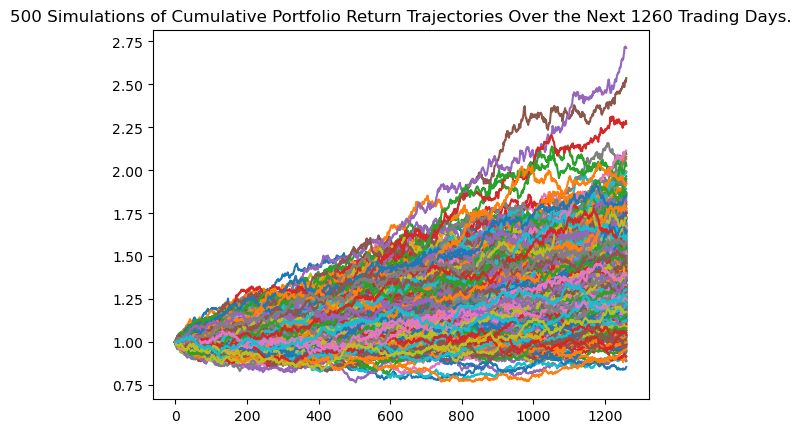

In [46]:
# Plot simulation outcomes
line_plot_new = MC_five_year.plot_simulation()

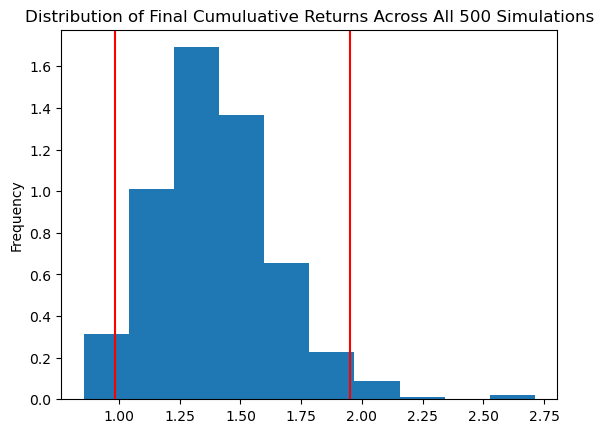

In [47]:
# Plot probability distribution and confidence intervals
distribution_plot_five = MC_five_year.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.399880
std               0.250611
min               0.855674
25%               1.229113
50%               1.371783
75%               1.536082
max               2.711991
95% CI Lower      0.982596
95% CI Upper      1.950896
Name: 1260, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $1080144650814.15 and $189130844095518.8


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [55]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_ten_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [56]:
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001531,0.999469,0.999165,1.004227,1.000826,0.994004,1.001714,1.000232,1.001901,0.991637,...,1.005318,1.000112,1.002344,0.994850,0.996499,0.997553,1.001191,0.995486,1.003550,0.994171
2,1.007749,1.004505,1.000159,1.002876,1.001720,0.990779,0.996913,1.002392,0.998340,0.994696,...,1.000037,0.998713,1.007617,0.992907,0.994086,0.998488,0.999623,0.993307,1.000782,0.997781
3,1.014949,1.004186,1.001254,1.011855,1.001461,0.989973,0.998738,1.004958,1.003196,0.992009,...,1.007597,0.994349,1.009996,0.990865,0.996729,0.997259,1.001878,0.990978,1.005873,0.998625
4,1.013144,1.017978,1.000852,1.005530,1.004530,0.995838,0.994576,1.008494,1.001273,0.990322,...,1.004137,0.998775,1.016746,1.003504,0.991357,1.002044,1.001328,0.988712,1.010104,0.998297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.180909,2.387034,1.681626,1.894773,1.822733,2.726752,1.848533,1.970042,1.655642,1.847655,...,3.272480,2.841805,1.747928,1.383392,2.287472,2.308558,1.624734,1.771942,1.778125,3.547988
2517,2.159653,2.399357,1.675775,1.887929,1.845209,2.730211,1.839191,1.979682,1.652118,1.854433,...,3.250166,2.853269,1.745469,1.371223,2.281090,2.306925,1.631275,1.785765,1.786151,3.544539
2518,2.180483,2.412642,1.663620,1.884551,1.855393,2.722697,1.838881,1.987297,1.631746,1.869165,...,3.242732,2.846662,1.743776,1.364682,2.283551,2.320136,1.616728,1.800218,1.783455,3.537086
2519,2.181397,2.395608,1.659353,1.885788,1.846614,2.717004,1.836656,1.987670,1.639479,1.855237,...,3.250223,2.846653,1.740718,1.363079,2.289064,2.311654,1.608098,1.778953,1.802323,3.558321


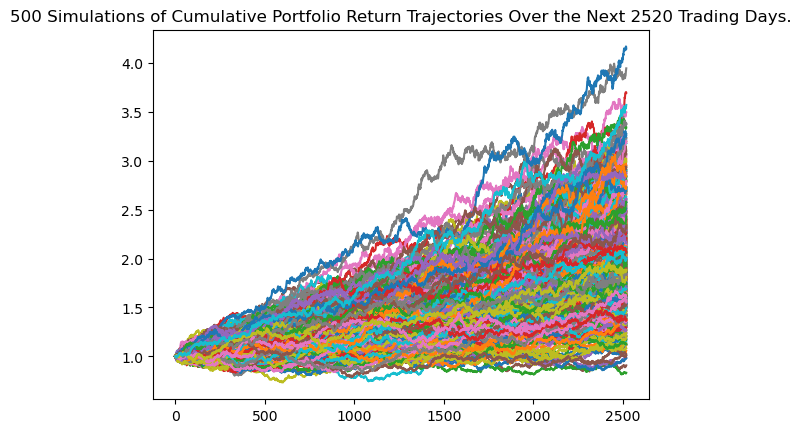

In [57]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

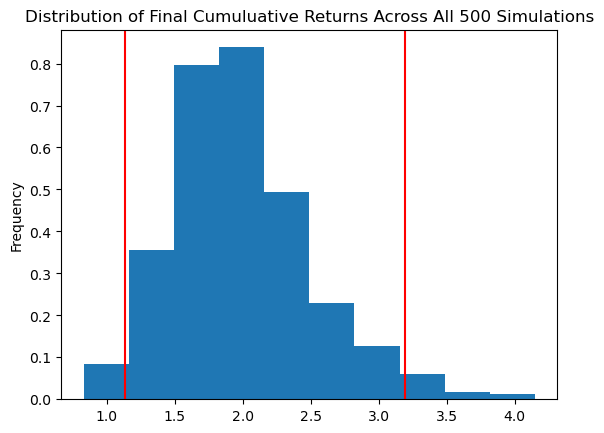

In [58]:
# Plot probability distribution and confidence intervals
distribution_plot_ten = MC_ten_year.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.982489
std               0.513770
min               0.833186
25%               1.622363
50%               1.910849
75%               2.266217
max               4.147412
95% CI Lower      1.135867
95% CI Upper      3.191550
Name: 2520, dtype: float64


In [61]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*10000,2)
ci_upper_ten = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $180024108469.03 and $31521807349253.14
